In [49]:
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import numpy as np

<b>Apply K-Means clustering</b>

In [50]:
np.random.seed(50)
X, y = make_moons(n_samples=500, noise=0.1)


In [51]:
print('x shape:',X.shape)

x shape: (500, 2)


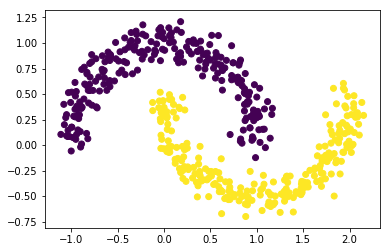

In [52]:
plt.scatter(X[:,0], X[:,1] ,c=y )

In [53]:
def get_random_centroids(k):
    cent={}
    while True:
        ri=np.random.choice(range(len(X)), k)
        if len(set(ri))==k:  #found distinct k indexes.
            for i in range(k):
                cent[i]=X[ri[i]]
            break
    return cent

In [54]:
def euclidianDistance(arr,c):
    return np.sqrt((arr[0]-c[0])**2+(arr[1]-c[1])**2)

In [55]:
def grouping(cent):
    
    gpp={}
    for i in range(0,len(cent)):
        gpp[i]=[]
        
    sz = len(X)
    for i in range(sz):
        data = X[i]
        idx,mn=0,9999999.00
        for j in range(0,len(cent)):
            dis=euclidianDistance(data,cent[j])
            if mn>dis:
                mn,idx=dis,j
        gpp[idx].append(data)
        #print(gpp)
    return gpp;

In [56]:
def average(grp):
    sz = len(grp)
    left=0
    right=0
    for i in range(0,sz):
        t = grp[i]
        left+=t[0]
        right+=t[1]
    c = [left/sz,right/sz]
    return c

In [57]:
def ploting(centroids):
        plt.scatter(X[:,0], X[:,1] ,c=y)
        ax = plt.axes()
        ax.set_facecolor("grey")
        for i in range(0,len(centroids)):
            plt.scatter(centroids[i][0], centroids[i][1], color='r', marker='*')
        plt.show()


Enter your clusters Number
8

Before centroids ->

 {0: array([-0.42234474,  0.93317983]), 1: array([1.88697529, 0.19056934]), 2: array([ 1.26351739, -0.47869115]), 3: array([ 1.47511797, -0.48526759]), 4: array([ 0.88071916, -0.69941162]), 5: array([0.83527035, 0.63233558]), 6: array([-0.66708181,  0.74197141]), 7: array([0.80177567, 0.61117936])}

 For K =  8 

After centroids ->

 {0: [-0.26321755394945245, 0.9499746235493729], 1: [1.9165882098453304, 0.13266748931621017], 2: [0.6156130675152601, -0.395806649605083], 3: [1.395218040352858, -0.4181963405475182], 4: [0.08547178879708278, 0.13325701871805487], 5: [0.9191105348641623, 0.35634846076480603], 6: [-0.8618927874602539, 0.41868543569209926], 7: [0.45398671245966626, 0.8713147497335364]}


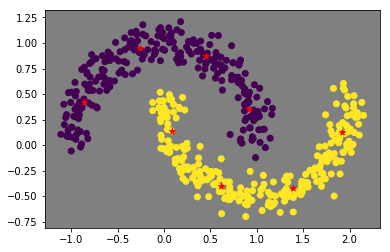

In [58]:
if __name__=="__main__":
        
        k=eval(input("\nEnter your clusters Number\n"))   #Check for any clusters Number..........
        
        centroids=get_random_centroids(k)
        print("\nBefore centroids ->\n\n",centroids)
        while True:
            gp= grouping(centroids)
            for i in range(0,len(centroids)):
                centroids[i]=average(gp[i])

            new_centroids={}
            gp2=grouping(centroids)
            for i in range(0,len(centroids)):
                new_centroids[i]=average(gp2[i])

            flag=0
            for i,j in zip(centroids,new_centroids):
                if(centroids[i]==new_centroids[j]):
                    flag+=1
            if(flag==len(centroids)):
                break


        print("\n","For K = ",k,"\n")
        print("After centroids ->\n\n",centroids)
        ploting(centroids)

In [ ]:
#Output example for k=12,8,10


 For K =  12 



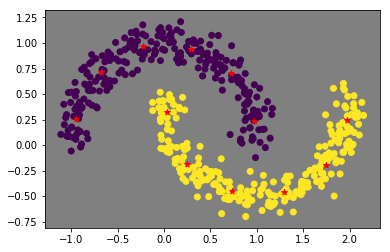

In [48]:
print("\n","For K = ",k,"\n")
ploting(centroids)


 For K =  8 



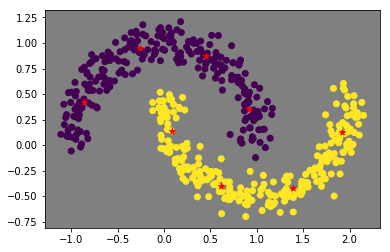

In [59]:
print("\n","For K = ",k,"\n")
ploting(centroids)


 For K =  10 



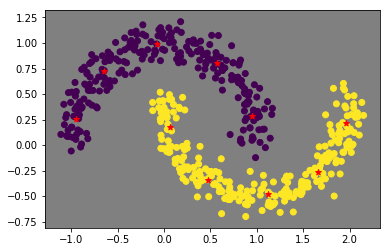

In [35]:
print("\n","For K = ",k,"\n")
ploting(centroids)